In [24]:
import numpy as np
import pandas as pd

#Visualisation Libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#Read dataset

df = pd.read_csv("Processed_Weather_Data.csv")
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('Unnamed: 115', axis = 1)
df = df.drop('Date', axis = 1)

In [26]:
y = df['RainTomorrow']
X = df.drop(columns = ['RainTomorrow'])

In [27]:
#Splitting the Data into Train and Test Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [29]:
y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score (Testing data): {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

Model accuracy score (Testing data): 0.8454
Training set score: 0.8503


In [30]:
# Print the Confusion Matrix 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

Confusion matrix

 [[35434  2029]
 [ 5391  5148]]

True Negatives(TN) =  35434

True Positives(TP) =  5148

False Positives(FP) =  2029

False Negatives(FN) =  5391


In [31]:
y_test.value_counts()

0    37463
1    10539
Name: RainTomorrow, dtype: int64

<AxesSubplot:>

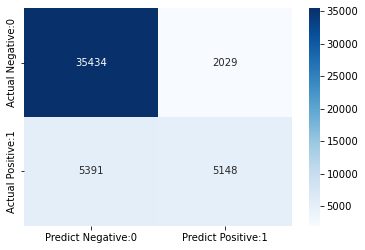

In [32]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, index=['Actual Negative:0', 'Actual Positive:1'], 
                                 columns=['Predict Negative:0', 'Predict Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

In [33]:
# Printing the Classification Metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     37463
           1       0.72      0.49      0.58     10539

    accuracy                           0.85     48002
   macro avg       0.79      0.72      0.74     48002
weighted avg       0.83      0.85      0.83     48002



In [34]:
# Additional Metrics for Model Evaluation

# False Negative Rate (Miss rate) : The proportion of positive samples that were incorrectly classified.
# FNR = FN / (FN + TP)

FNR = FN / (FN + TP)
print('False Negative Rate : {0:0.2f}'. format(FNR))

# Youden's Index : Measures the discriminative power of the model
# YI : TPR + TNR - 1

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

YI = TPR + TNR - 1
print('Youdens Index : {0:0.2f}'. format(YI))

# Discriminant Power : This metric evaluates how well classification model distinguishes 
# between positive and negative class

# DP = (3)^0.5 / Pi * (log(TPR/(1-TNR)) + log(TNR/(1-TPR)))

DP = ((3)**0.5 / 3.14) * (np.log(TPR/(1-TNR)) + np.log(TNR/(1-TPR)))

print('Discriminant Power : {0:0.2f}'. format(DP))

#Balanced Classification Rate (Blanaced Accuracy): This Metric combines both specificity and sensitivity.
# BCR = 0.5 * (TPR + TNR)

BCR = 0.5 * (TPR + TNR)
print('Balanced Classification Rate : {0:0.2f}'. format(BCR))

# Geometric Mean : It tries to aggregate specificity and sensitivity
# GM : (TPR * TNR)**0.5

GM = (TPR * TNR)**0.5
print('Geometric Mean : {0:0.2f}'. format(GM))

False Negative Rate : 0.51
Youdens Index : 0.43
Discriminant Power : 1.55
Balanced Classification Rate : 0.72
Geometric Mean : 0.68


In [35]:
# Hyper Parameter Optimization using Grid Search CV
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]


grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             n_jobs=-1,
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy', verbose=2)

In [36]:
# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

Parameters that give the best results : 

 {'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(random_state=0, solver='liblinear')


In [37]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8454


In [38]:
# Choosing the model suggested by Grid Search CV and using it to predict the values
model = grid_search.best_estimator_
y_pred = model.predict(X_test)


# Print the Confusion Matrix 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

Confusion matrix

 [[35434  2029]
 [ 5391  5148]]

True Positives(TP) =  35434

True Negatives(TN) =  5148

False Positives(FP) =  2029

False Negatives(FN) =  5391


<AxesSubplot:>

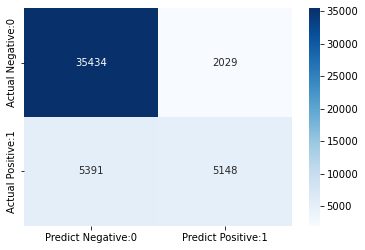

In [40]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, index=['Actual Negative:0', 'Actual Positive:1'], 
                                 columns=['Predict Negative:0', 'Predict Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

In [41]:
# Printing the Classification Metrics (after model selection by Grid Search CV)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     37463
           1       0.72      0.49      0.58     10539

    accuracy                           0.85     48002
   macro avg       0.79      0.72      0.74     48002
weighted avg       0.83      0.85      0.83     48002



In [42]:
# Additional Metrics (after model selection by Grid Search CV)
FNR = FN / (FN + TP)
print('False Negative Rate : {0:0.2f}'. format(FNR))

# Youden's Index : Measures the discriminative power of the model
# YI : TPR + TNR - 1

# Want this to be closer to 1. 

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

YI = TPR + TNR - 1
print('Youdens Index : {0:0.2f}'. format(YI))

# Discriminant Power : This metric evaluates how well classification model distinguishes 
# between positive and negative class

# DP = (3)^0.5 / Pi * (log(TPR/(1-TNR)) + log(TNR/(1-TPR)))

DP = ((3)**0.5 / 3.14) * (np.log(TPR/(1-TNR)) + np.log(TNR/(1-TPR)))

print('Discriminant Power : {0:0.2f}'. format(DP))

#Balanced Classification Rate (Blanaced Accuracy): This Metric combines both specificity and sensitivity.
# BCR = 0.5 * (TPR + TNR)

BCR = 0.5 * (TPR + TNR)
print('Balanced Classification Rate : {0:0.2f}'. format(BCR))

# Geometric Mean : It tries to aggregate specificity and sensitivity
# GM : (TPR * TNR)**0.5

GM = (TPR * TNR)**0.5
print('Geometric Mean : {0:0.2f}'. format(GM))

False Negative Rate : 0.13
Youdens Index : 0.59
Discriminant Power : 1.55
Balanced Classification Rate : 0.79
Geometric Mean : 0.79


# Random Forest Classifier 

In [43]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [44]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score (Testing data): {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

Model accuracy score (Testing data): 0.7811
Training set score: 0.7817


In [45]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

Confusion matrix

 [[37462     1]
 [10505    34]]

True Positives(TP) =  37462

True Negatives(TN) =  34

False Positives(FP) =  1

False Negatives(FN) =  10505


<AxesSubplot:>

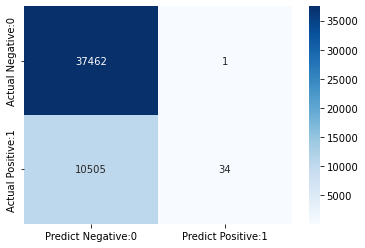

In [46]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, index=['Actual Negative:0', 'Actual Positive:1'], 
                                 columns=['Predict Negative:0', 'Predict Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

In [47]:
# Printing the Classification Metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     37463
           1       0.97      0.00      0.01     10539

    accuracy                           0.78     48002
   macro avg       0.88      0.50      0.44     48002
weighted avg       0.82      0.78      0.69     48002



In [48]:
# Additional Metrics
FNR = FN / (FN + TP)
print('False Negative Rate : {0:0.2f}'. format(FNR))


TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

YI = TPR + TNR - 1
print('Youdens Index : {0:0.2f}'. format(YI))


DP = ((3)**0.5 / 3.14) * (np.log(TPR/(1-TNR)) + np.log(TNR/(1-TPR)))
print('Discriminant Power : {0:0.2f}'. format(DP))

BCR = 0.5 * (TPR + TNR)
print('Balanced Classification Rate : {0:0.2f}'. format(BCR))

GM = (TPR * TNR)**0.5
print('Geometric Mean : {0:0.2f}'. format(GM))

False Negative Rate : 0.22
Youdens Index : 0.75
Discriminant Power : 2.65
Balanced Classification Rate : 0.88
Geometric Mean : 0.87


In [49]:
# Hyper Parameter Optimization using Grid Search CV
from sklearn.model_selection import GridSearchCV

parameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


grid_search = GridSearchCV(estimator = clf,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2,
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 84 candidates, totalling 168 fits


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(max_depth=2, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='accuracy', verbose=2)

In [50]:
# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

Parameters that give the best results : 

 {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


Estimator that was chosen by the search : 

 RandomForestClassifier(max_depth=8, n_estimators=200, random_state=0)


In [51]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8366


In [52]:
# Choosing the model suggested by Grid Search CV and using it to predict the values

model = grid_search.best_estimator_
y_pred = model.predict(X_test)

# Print the Confusion Matrix 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

Confusion matrix

 [[36540   923]
 [ 6919  3620]]

True Positives(TP) =  36540

True Negatives(TN) =  3620

False Positives(FP) =  923

False Negatives(FN) =  6919


<AxesSubplot:>

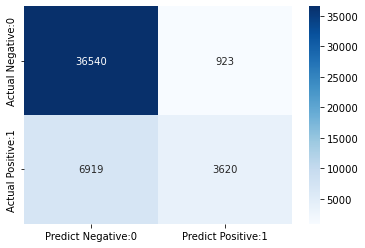

In [53]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, index=['Actual Negative:0', 'Actual Positive:1'], 
                                 columns=['Predict Negative:0', 'Predict Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

In [54]:
# Printing the Classification Metrics (after model selection by Grid Search CV)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90     37463
           1       0.80      0.34      0.48     10539

    accuracy                           0.84     48002
   macro avg       0.82      0.66      0.69     48002
weighted avg       0.83      0.84      0.81     48002



In [55]:
# Additional Metrics (after model selection by Grid Search CV)
FNR = FN / (FN + TP)
print('False Negative Rate : {0:0.2f}'. format(FNR))


TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

YI = TPR + TNR - 1
print('Youdens Index : {0:0.2f}'. format(YI))


DP = ((3)**0.5 / 3.14) * (np.log(TPR/(1-TNR)) + np.log(TNR/(1-TPR)))
print('Discriminant Power : {0:0.2f}'. format(DP))

BCR = 0.5 * (TPR + TNR)
print('Balanced Classification Rate : {0:0.2f}'. format(BCR))

GM = (TPR * TNR)**0.5
print('Geometric Mean : {0:0.2f}'. format(GM))

False Negative Rate : 0.16
Youdens Index : 0.64
Discriminant Power : 1.67
Balanced Classification Rate : 0.82
Geometric Mean : 0.82


# KNN Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [57]:
y_pred = neigh.predict(X_test)

from sklearn.metrics import accuracy_score

In [58]:
print('Model accuracy score (Testing data): {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score (Testing data): 0.7923


In [59]:
print('Training set score: {:.4f}'.format(neigh.score(X_train, y_train)))

[CV] END .........................................penalty=l1; total time=  23.3s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=200; total time=   4.2s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=500; total time=   8.8s
[CV] END criterion=gini, max_depth=3, max_features=log2, n_estimators=200; total time=   3.8s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   5.6s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=200; total time=   6.5s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=500; total time=  11.0s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=200; total time=   4.5s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=200; total time=   7.7s
[CV] END criterion=gini, max_depth=6, max_features=auto, n_estimators=500; total time=  19.2s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200

[CV] END .........................................penalty=l2; total time=   2.9s
[CV] END .........................................penalty=l2; total time=   2.2s
[CV] END ................................................C=1; total time=   1.8s
[CV] END ................................................C=1; total time=   2.1s
[CV] END ...............................................C=10; total time=   2.4s
[CV] END ..............................................C=100; total time=   2.3s
[CV] END ..............................................C=100; total time=   2.1s
[CV] END .............................................C=1000; total time=   2.2s
[CV] END .............................................C=1000; total time=   1.6s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=500; total time=  10.7s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=200; total time=   5.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, n_estimators=500; total ti

In [60]:
# Print the Confusion Matrix 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

Confusion matrix

 [[34043  3420]
 [ 6552  3987]]

True Positives(TP) =  34043

True Negatives(TN) =  3987

False Positives(FP) =  3420

False Negatives(FN) =  6552


<AxesSubplot:>

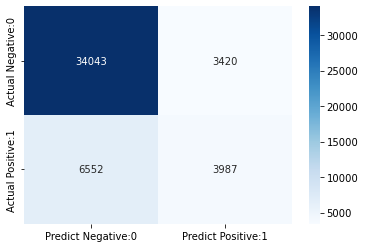

In [61]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, index=['Actual Negative:0', 'Actual Positive:1'], 
                                 columns=['Predict Negative:0', 'Predict Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

In [62]:
# Printing the Classification Metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87     37463
           1       0.54      0.38      0.44     10539

    accuracy                           0.79     48002
   macro avg       0.69      0.64      0.66     48002
weighted avg       0.77      0.79      0.78     48002



In [63]:
# Additional Metrics
FNR = FN / (FN + TP)
print('False Negative Rate : {0:0.2f}'. format(FNR))


TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

YI = TPR + TNR - 1
print('Youdens Index : {0:0.2f}'. format(YI))


DP = ((3)**0.5 / 3.14) * (np.log(TPR/(1-TNR)) + np.log(TNR/(1-TPR)))
print('Discriminant Power : {0:0.2f}'. format(DP))

BCR = 0.5 * (TPR + TNR)
print('Balanced Classification Rate : {0:0.2f}'. format(BCR))

GM = (TPR * TNR)**0.5
print('Geometric Mean : {0:0.2f}'. format(GM))

False Negative Rate : 0.16
Youdens Index : 0.38
Discriminant Power : 0.99
Balanced Classification Rate : 0.69
Geometric Mean : 0.67


In [64]:
# Hyper Parameter Optimization using GridSearchCV

k_range = list(range(1, 10))
parameters = dict(n_neighbors=k_range)

grid_search = GridSearchCV(estimator = neigh,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2,
                           verbose=2)

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END .........................................penalty=l1; total time=  25.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=500; total time=  10.8s
[CV] END criterion=gini, max_depth=3, max_features=auto, n_estimators=500; total time=  11.4s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500; total time=  14.8s
[CV] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500; total time=  16.0s
[CV] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=200; total time=   7.9s
[CV] END criterion=gini, max_depth=6, max_features=log2, n_estimators=500; total time=  14.1s
[CV] END criterion=gini, max_depth=7, max_features=log2, n_estimators=200; total time=   6.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=200; total time=  10.2s
[CV] END criterion=gini, max_depth=8, max_features=auto, n_estimators=500; total time=  25.8s
[CV] END crit

GridSearchCV(cv=2, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy', verbose=2)

In [65]:
# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

Parameters that give the best results : 

 {'n_neighbors': 9}


Estimator that was chosen by the search : 

 KNeighborsClassifier(n_neighbors=9)


In [66]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8119


In [67]:
# Choosing the model suggested by Grid Search CV and using it to predict the values

model = grid_search.best_estimator_
y_pred = model.predict(X_test)

# Print the Confusion Matrix 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

Confusion matrix

 [[35424  2039]
 [ 6992  3547]]

True Positives(TP) =  35424

True Negatives(TN) =  3547

False Positives(FP) =  2039

False Negatives(FN) =  6992


<AxesSubplot:>

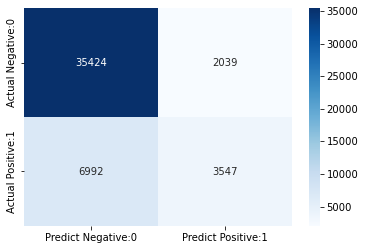

In [68]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, index=['Actual Negative:0', 'Actual Positive:1'], 
                                 columns=['Predict Negative:0', 'Predict Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

In [69]:
# Printing the Classification Metrics (after model selection by Grid Search CV)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     37463
           1       0.63      0.34      0.44     10539

    accuracy                           0.81     48002
   macro avg       0.74      0.64      0.66     48002
weighted avg       0.79      0.81      0.79     48002



In [70]:
# Additional Metrics (after model selection by Grid Search CV)
FNR = FN / (FN + TP)
print('False Negative Rate : {0:0.2f}'. format(FNR))


TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

YI = TPR + TNR - 1
print('Youdens Index : {0:0.2f}'. format(YI))


DP = ((3)**0.5 / 3.14) * (np.log(TPR/(1-TNR)) + np.log(TNR/(1-TPR)))
print('Discriminant Power : {0:0.2f}'. format(DP))

BCR = 0.5 * (TPR + TNR)
print('Balanced Classification Rate : {0:0.2f}'. format(BCR))

GM = (TPR * TNR)**0.5
print('Geometric Mean : {0:0.2f}'. format(GM))

False Negative Rate : 0.16
Youdens Index : 0.47
Discriminant Power : 1.20
Balanced Classification Rate : 0.74
Geometric Mean : 0.73


# Naive Bayes Classifier

In [71]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [72]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score (Testing data): {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

Model accuracy score (Testing data): 0.7811
Training set score: 0.7817


In [73]:
# Print the Confusion Matrix 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

Confusion matrix

 [[37462     1]
 [10505    34]]

True Positives(TP) =  37462

True Negatives(TN) =  34

False Positives(FP) =  1

False Negatives(FN) =  10505


<AxesSubplot:>

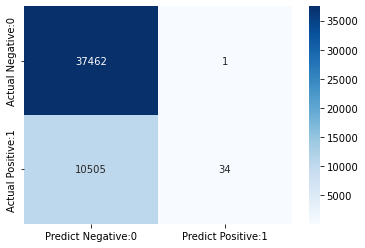

In [74]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, index=['Actual Negative:0', 'Actual Positive:1'], 
                                 columns=['Predict Negative:0', 'Predict Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

In [75]:
# Printing the Classification Metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     37463
           1       0.97      0.00      0.01     10539

    accuracy                           0.78     48002
   macro avg       0.88      0.50      0.44     48002
weighted avg       0.82      0.78      0.69     48002



In [76]:
# Additional Metrics
FNR = FN / (FN + TP)
print('False Negative Rate : {0:0.2f}'. format(FNR))


TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

YI = TPR + TNR - 1
print('Youdens Index : {0:0.2f}'. format(YI))


DP = ((3)**0.5 / 3.14) * (np.log(TPR/(1-TNR)) + np.log(TNR/(1-TPR)))
print('Discriminant Power : {0:0.2f}'. format(DP))

BCR = 0.5 * (TPR + TNR)
print('Balanced Classification Rate : {0:0.2f}'. format(BCR))

GM = (TPR * TNR)**0.5
print('Geometric Mean : {0:0.2f}'. format(GM))

False Negative Rate : 0.22
Youdens Index : 0.75
Discriminant Power : 2.65
Balanced Classification Rate : 0.88
Geometric Mean : 0.87


# AdaBoost Classifier 

In [77]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [78]:
y_pred = abc.predict(X_test)

from sklearn.metrics import accuracy_score

In [79]:
print('Model accuracy score (Testing data): {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('Training set score: {:.4f}'.format(abc.score(X_train, y_train)))

Model accuracy score (Testing data): 0.8447
Training set score: 0.8485


In [80]:
# Print the Confusion Matrix 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

Confusion matrix

 [[35438  2025]
 [ 5432  5107]]

True Positives(TP) =  35438

True Negatives(TN) =  5107

False Positives(FP) =  2025

False Negatives(FN) =  5432


<AxesSubplot:>

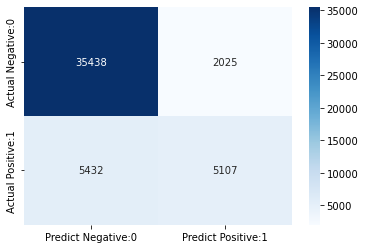

In [81]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, index=['Actual Negative:0', 'Actual Positive:1'], 
                                 columns=['Predict Negative:0', 'Predict Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

In [82]:
# Printing the Classification Metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90     37463
           1       0.72      0.48      0.58     10539

    accuracy                           0.84     48002
   macro avg       0.79      0.72      0.74     48002
weighted avg       0.83      0.84      0.83     48002



In [83]:
# Additional Metrics
FNR = FN / (FN + TP)
print('False Negative Rate : {0:0.2f}'. format(FNR))


TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

YI = TPR + TNR - 1
print('Youdens Index : {0:0.2f}'. format(YI))


DP = ((3)**0.5 / 3.14) * (np.log(TPR/(1-TNR)) + np.log(TNR/(1-TPR)))
print('Discriminant Power : {0:0.2f}'. format(DP))

BCR = 0.5 * (TPR + TNR)
print('Balanced Classification Rate : {0:0.2f}'. format(BCR))

GM = (TPR * TNR)**0.5
print('Geometric Mean : {0:0.2f}'. format(GM))

False Negative Rate : 0.13
Youdens Index : 0.58
Discriminant Power : 1.54
Balanced Classification Rate : 0.79
Geometric Mean : 0.79


# Gradient Boosting Classifier

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
xgb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

In [85]:
from sklearn.metrics import accuracy_score

y_pred = xgb.predict(X_test)

print('Model accuracy score (Testing data): {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('Training set score: {:.4f}'.format(xgb.score(X_train, y_train)))

Model accuracy score (Testing data): 0.8462
Training set score: 0.8502


In [86]:
# Print the Confusion Matrix 

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

Confusion matrix

 [[35514  1949]
 [ 5436  5103]]

True Positives(TP) =  35514

True Negatives(TN) =  5103

False Positives(FP) =  1949

False Negatives(FN) =  5436


<AxesSubplot:>

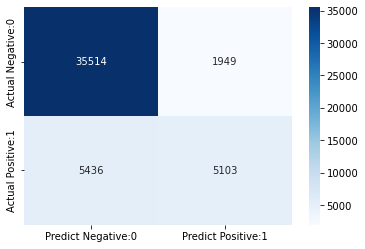

In [87]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, index=['Actual Negative:0', 'Actual Positive:1'], 
                                 columns=['Predict Negative:0', 'Predict Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

In [88]:
# Printing the Classification Metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     37463
           1       0.72      0.48      0.58     10539

    accuracy                           0.85     48002
   macro avg       0.80      0.72      0.74     48002
weighted avg       0.84      0.85      0.83     48002



In [89]:
# Additional Metrics
FNR = FN / (FN + TP)
print('False Negative Rate : {0:0.2f}'. format(FNR))


TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

YI = TPR + TNR - 1
print('Youdens Index : {0:0.2f}'. format(YI))


DP = ((3)**0.5 / 3.14) * (np.log(TPR/(1-TNR)) + np.log(TNR/(1-TPR)))
print('Discriminant Power : {0:0.2f}'. format(DP))

BCR = 0.5 * (TPR + TNR)
print('Balanced Classification Rate : {0:0.2f}'. format(BCR))

GM = (TPR * TNR)**0.5
print('Geometric Mean : {0:0.2f}'. format(GM))

False Negative Rate : 0.13
Youdens Index : 0.59
Discriminant Power : 1.57
Balanced Classification Rate : 0.80
Geometric Mean : 0.79


# XGBoost Classifier

In [90]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [91]:
from xgboost import XGBClassifier

In [92]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [93]:
from sklearn.metrics import accuracy_score

y_pred = xgb.predict(X_test)

print('Model accuracy score (Testing data): {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('Training set score: {:.4f}'.format(xgb.score(X_train, y_train)))

Model accuracy score (Testing data): 0.8562
Training set score: 0.8890


In [94]:
# Print the Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

Confusion matrix

 [[35410  2053]
 [ 4848  5691]]

True Positives(TP) =  35410

True Negatives(TN) =  5691

False Positives(FP) =  2053

False Negatives(FN) =  4848


<AxesSubplot:>

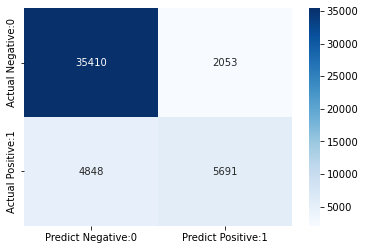

In [95]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, index=['Actual Negative:0', 'Actual Positive:1'], 
                                 columns=['Predict Negative:0', 'Predict Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

In [96]:
# Printing the Classification Metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     37463
           1       0.73      0.54      0.62     10539

    accuracy                           0.86     48002
   macro avg       0.81      0.74      0.77     48002
weighted avg       0.85      0.86      0.85     48002



In [97]:
# Additional Metrics
FNR = FN / (FN + TP)
print('False Negative Rate : {0:0.2f}'. format(FNR))


TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

YI = TPR + TNR - 1
print('Youdens Index : {0:0.2f}'. format(YI))


DP = ((3)**0.5 / 3.14) * (np.log(TPR/(1-TNR)) + np.log(TNR/(1-TPR)))
print('Discriminant Power : {0:0.2f}'. format(DP))

BCR = 0.5 * (TPR + TNR)
print('Balanced Classification Rate : {0:0.2f}'. format(BCR))

GM = (TPR * TNR)**0.5
print('Geometric Mean : {0:0.2f}'. format(GM))

False Negative Rate : 0.12
Youdens Index : 0.61
Discriminant Power : 1.66
Balanced Classification Rate : 0.81
Geometric Mean : 0.80


In [98]:
# Hyper Parameter Optimization using Grid Search CV

from sklearn.model_selection import GridSearchCV
parameters = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.6, 0.8, 1.0],
        }

grid_search = GridSearchCV(estimator = xgb,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           verbose=2,
                           cv=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 27 candidates, totalling 54 fits


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                   

In [99]:
# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

Parameters that give the best results : 

 {'gamma': 1.5, 'min_child_weight': 5, 'subsample': 1.0}


Estimator that was chosen by the search : 

 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [100]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8560


In [101]:
# Choosing the model suggested by Grid Search CV and using it to predict the values

model = grid_search.best_estimator_
y_pred = model.predict(X_test)

# Print the Confusion Matrix 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]

Confusion matrix

 [[35454  2009]
 [ 4901  5638]]

True Positives(TP) =  35454

True Negatives(TN) =  5638

False Positives(FP) =  2009

False Negatives(FN) =  4901


<AxesSubplot:>

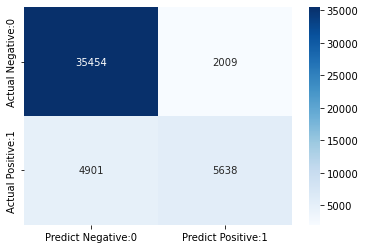

In [102]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, index=['Actual Negative:0', 'Actual Positive:1'], 
                                 columns=['Predict Negative:0', 'Predict Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues')

In [103]:
# Printing the Classification Metrics (after model selection by Grid Search CV)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     37463
           1       0.74      0.53      0.62     10539

    accuracy                           0.86     48002
   macro avg       0.81      0.74      0.77     48002
weighted avg       0.85      0.86      0.85     48002



In [104]:
# Additional Metrics (after model selection by Grid Search CV)
FNR = FN / (FN + TP)
print('False Negative Rate : {0:0.2f}'. format(FNR))


TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

YI = TPR + TNR - 1
print('Youdens Index : {0:0.2f}'. format(YI))


DP = ((3)**0.5 / 3.14) * (np.log(TPR/(1-TNR)) + np.log(TNR/(1-TPR)))
print('Discriminant Power : {0:0.2f}'. format(DP))

BCR = 0.5 * (TPR + TNR)
print('Balanced Classification Rate : {0:0.2f}'. format(BCR))

GM = (TPR * TNR)**0.5
print('Geometric Mean : {0:0.2f}'. format(GM))

False Negative Rate : 0.12
Youdens Index : 0.62
Discriminant Power : 1.67
Balanced Classification Rate : 0.81
Geometric Mean : 0.81
[CV] END .......gamma=0.5, min_child_weight=5, subsample=0.6; total time=  42.5s
[CV] END ......gamma=0.5, min_child_weight=10, subsample=0.6; total time=  43.7s
[CV] END .........gamma=1, min_child_weight=1, subsample=1.0; total time=  39.1s
[CV] END ........gamma=1, min_child_weight=10, subsample=0.6; total time=  40.4s
[CV] END .......gamma=1.5, min_child_weight=1, subsample=0.8; total time=  38.6s
[CV] END .......gamma=1.5, min_child_weight=5, subsample=1.0; total time=  44.2s
[CV] END .......gamma=0.5, min_child_weight=1, subsample=1.0; total time=  39.7s
[CV] END .......gamma=0.5, min_child_weight=5, subsample=0.8; total time=  40.5s
[CV] END .........gamma=1, min_child_weight=1, subsample=0.6; total time=  44.1s
[CV] END .........gamma=1, min_child_weight=5, subsample=0.8; total time=  38.9s
[CV] END .......gamma=1.5, min_child_weight=1, subsample=0